In [17]:
import datetime
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

## download the data here: https://2015.recsyschallenge.com/challenge.html

In [18]:
%matplotlib inline

In [19]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ')

In [20]:
buys_column_names = ['Session_ID','Time_stamp','Item_ID','Price','Quantity']
df_buys = pd.read_csv('yoochoose-buys.dat', names=buys_column_names, parse_dates=['Time_stamp'], date_parser=dateparse)
df_buys_ALL = df_buys[df_buys['Time_stamp'].between('2014-09-01','2014-09-02')]
df_buys_ALL.to_pickle("./df_buys_ALL.pkl")

In [21]:
clicks_column_names = ['Session_ID','Time_stamp','Item_ID','Category']
click_dtype = {'Session_ID':int, 'Time_stamp':int, 'Item_ID':int, 'Category':int}
df_clicks = pd.read_csv('yoochoose-clicks.dat', names = clicks_column_names, parse_dates=['Time_stamp'], date_parser=dateparse)
df_clicks_ALL = df_clicks[df_clicks['Time_stamp'].between('2014-09-01','2014-09-02')]
df_clicks_ALL.to_pickle("./df_clicks_ALL.pkl")

In [22]:
df_buys_ALL = pd.read_pickle("./df_buys_ALL.pkl")
df_clicks_ALL = pd.read_pickle("./df_clicks_ALL.pkl")

In [23]:
df_buys_ALL = df_buys_ALL[df_buys_ALL['Time_stamp'].between('2014-09-01','2014-09-30')]
df_clicks_ALL = df_clicks_ALL[df_clicks_ALL['Time_stamp'].between('2014-09-01','2014-09-30')]

In [24]:
df_buys_ALL

,Session_ID,Time_stamp,Item_ID,Price,Quantity
900729,9641594,2014-09-01 09:09:25.575,214853342,2093,2
900730,9641594,2014-09-01 09:09:25.596,214853340,837,2
900731,9641594,2014-09-01 09:09:25.614,214853420,1046,2
900738,9571651,2014-09-01 13:21:55.278,214676580,13509,1
900739,9571651,2014-09-01 13:22:14.336,214676580,13509,1
900759,9370132,2014-09-01 04:09:15.566,214853767,1046,1
900760,9370132,2014-09-01 04:09:15.790,214853767,1046,1
900771,9725747,2014-09-01 21:56:03.779,214853454,1884,1
900772,9725747,2014-09-01 21:56:03.788,214853865,418,1
900776,9431393,2014-09-01 13:38:48.351,214846258,941,1


In [25]:
indexes = ['Session_ID', 'Item_ID']
df = df_clicks_ALL.merge(df_buys_ALL, how='left', on = indexes)

In [26]:
df_buys_ALL['Buyer'] = df['Item_ID'].map(lambda x:x is not None)

In [27]:
df['Time_stamp_y'] = df['Time_stamp_y'].fillna(df['Time_stamp_x'])

In [28]:
df['Buyer'] = df['Quantity'] > 0

In [29]:
df.columns = ['Session_ID','Clicked_Time','Item_ID','Category','Buy_Time','Price','Quantity', 'Buyer']
df['Quantity'] = df['Quantity'].fillna(0)
df['Price'] = df['Price'].fillna(0)
df['Buy_Time'] = df['Buy_Time'].fillna(df['Clicked_Time'])

In [30]:
df['Clicked_Weekday'] = pd.Series(df['Clicked_Time'].apply(lambda x: x.weekday()))
df['Clicked_HourOfDay'] = pd.Series(df['Clicked_Time'].apply(lambda x: x.hour))
df['Clicked_Day'] = pd.Series(df['Clicked_Time'].apply(lambda x: x.strftime('%m/%d')))
df['Buy_Day'] = pd.Series(df['Buy_Time'].apply(lambda x: x.strftime('%m/%d')))

In [31]:
Time_Delta = abs(df['Buy_Time'] - df['Clicked_Time']).apply(lambda x: x / np.timedelta64(1, 'm'))
df['Time_Gap'] = pd.Series(Time_Delta)
df['Sales'] = pd.Series((df['Price'] * df['Quantity']).apply(lambda x: x))

In [32]:
df_buyrate = df.groupby('Clicked_Day')['Sales'].mean()
df_buyrate.head()

Clicked_Day
09/01    252.302944
09/02     52.909934
09/03     28.286727
09/04    250.073380
09/05    231.825436
Name: Sales, dtype: float64

Text(0.5, 0.98, 'Total Sales (USD)')

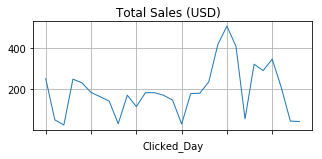

In [33]:
df_buyrate = df.groupby('Clicked_Day')['Sales'].mean()
fig = df_buyrate.sort_index().plot(figsize=(5,2), grid=True, linewidth=1).get_figure()
fig.suptitle('Total Sales (USD)')

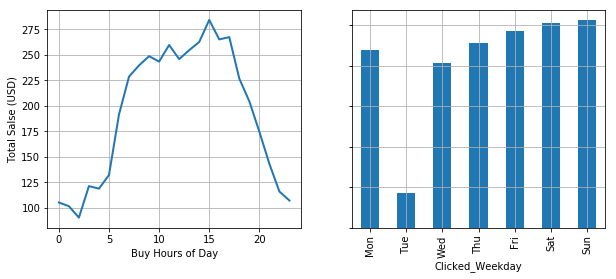

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
df_buy_hour = df.groupby('Clicked_HourOfDay')['Sales'].mean()
df_buy_hour.sort_index().plot(ax=axs[0], grid=True, linewidth=2).get_figure()
axs[0].set_ylabel('Total Salse (USD)')
axs[0].set_xlabel('Buy Hours of Day')

WEEKDAY_TO_NAME = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 
                   4: 'Fri', 5: 'Sat', 6: 'Sun',}

df_buy_day = df.groupby('Clicked_Weekday')['Sales'].mean()
df_buy_day = df_buy_day.sort_index().reset_index()
df_buy_day['Clicked_Weekday'] = df_buy_day['Clicked_Weekday'].map(lambda n: WEEKDAY_TO_NAME[n])
df_buy_day = df_buy_day.set_index('Clicked_Weekday')
df_buy_day.plot(ax=axs[1], kind='bar', legend=False, grid=True, linewidth=2, sharey=True).get_figure()
fig.savefig("df_click_on_hours_and_weekday.pdf")

In [35]:
df_buys_ALL['Buy_Weekday'] = pd.Series(df_buys_ALL['Time_stamp'].apply(lambda x: x.weekday()))
df_buys_ALL['Buy_HourOfDay'] = pd.Series(df_buys_ALL['Time_stamp'].apply(lambda x: x.hour))
df_buys_ALL['Buy_Day'] = pd.Series(df_buys_ALL['Time_stamp'].apply(lambda x: x.strftime('%m/%d')))
df_buys_ALL['Sales'] = pd.Series((df_buys_ALL['Price'] * df_buys_ALL['Quantity']).apply(lambda x: x))
df_buys_ALL.head()

,Session_ID,Time_stamp,Item_ID,Price,Quantity,Buyer,Buy_Weekday,Buy_HourOfDay,Buy_Day,Sales
900729,9641594,2014-09-01 09:09:25.575,214853342,2093,2,True,0,9,09/01,4186
900730,9641594,2014-09-01 09:09:25.596,214853340,837,2,True,0,9,09/01,1674
900731,9641594,2014-09-01 09:09:25.614,214853420,1046,2,True,0,9,09/01,2092
900738,9571651,2014-09-01 13:21:55.278,214676580,13509,1,True,0,13,09/01,13509
900739,9571651,2014-09-01 13:22:14.336,214676580,13509,1,True,0,13,09/01,13509


Text(0.5, 0.98, 'Average Sales (USD)')

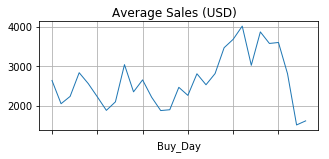

In [36]:
df_buyrate = df_buys_ALL.groupby('Buy_Day')['Price'].mean()
fig = df_buyrate.sort_index().plot(figsize=(5,2), grid=True, linewidth=1).get_figure()
fig.suptitle('Average Sales (USD)')

Text(0.5, 0.98, 'Average Sales (USD)')

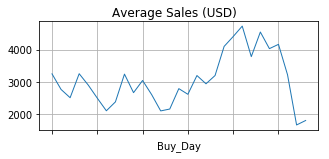

In [37]:
df_buyrate = df_buys_ALL.groupby('Buy_Day')['Sales'].mean()
fig = df_buyrate.sort_index().plot(figsize=(5,2), grid=True, linewidth=1).get_figure()
fig.suptitle('Average Sales (USD)')

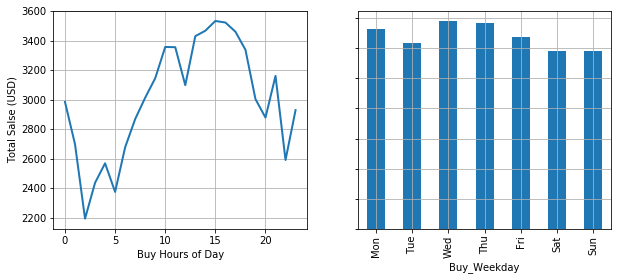

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
df_buy_hour = df_buys_ALL.groupby('Buy_HourOfDay')['Sales'].mean()
df_buy_hour.sort_index().plot(ax=axs[0], grid=True, linewidth=2).get_figure()
axs[0].set_ylabel('Total Salse (USD)')
axs[0].set_xlabel('Buy Hours of Day')

WEEKDAY_TO_NAME = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 
                   4: 'Fri', 5: 'Sat', 6: 'Sun',}

df_buy_day = df_buys_ALL.groupby('Buy_Weekday')['Sales'].mean()
df_buy_day = df_buy_day.sort_index().reset_index()
df_buy_day['Buy_Weekday'] = df_buy_day['Buy_Weekday'].map(lambda n: WEEKDAY_TO_NAME[n])
df_buy_day = df_buy_day.set_index('Buy_Weekday')
df_buy_day.plot(ax=axs[1], kind='bar', legend=False, grid=True, linewidth=2, sharey=True).get_figure()
fig.savefig("df_sales_on_hours_and_weekday.pdf")

In [39]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict

In [40]:
def classification_metrics(Y_pred, Y_true):
    #NOTE: It is important to provide the output in the same order
    return (accuracy_score(Y_true,Y_pred),
            roc_auc_score(Y_true,Y_pred),
            precision_score(Y_true,Y_pred),
            recall_score(Y_true,Y_pred),
            f1_score(Y_true,Y_pred))

In [41]:
def plot_PR(Y_pred,Y_test):
    average_precision = average_precision_score(Y_test, Y_pred)
    precision, recall, _ = precision_recall_curve(Y_test, Y_pred)
    plt.step(recall, precision, color='b', alpha=0.2,where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [42]:
def display_metrics(classifireName, Y_pred, Y_true):
    print("______________________________________________")
    print("Classifier: "+classifireName)
    acc, auc_, precision, recall, f1score = classification_metrics(Y_pred,Y_true)
    print("Accuracy: "+str(acc))
    print("ROC AUC: "+str(auc_))
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print("F1-score: "+str(f1score))
    print("______________________________________________")
    print("")

In [43]:
def plot_ROC(Y_pred, Y_test):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # for i in range(n_classes):
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 3 #Line Width
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of user become a buyer')
    plt.legend(loc="lower right")
    plt.show()

In [99]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

class_names = ['Positive', 'Negative']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [100]:
RANDOM_STATE = 903434960

In [101]:
X1 = df.drop(['Item_ID','Clicked_Time',\
            'Category','Buy_Time','Buyer',\
            'Clicked_Day','Buy_Day'],axis=1)
Y1 = df['Buyer'].values

In [102]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=RANDOM_STATE)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [104]:
model = LogisticRegression()

k_fold = KFold(n_splits=10, random_state=RANDOM_STATE) 
score = cross_val_score(model, X1, Y1, cv=k_fold, scoring='accuracy').mean()
Y_pred = cross_val_predict(model, X1, Y1, cv=k_fold)

display_metrics("Logistic Regression",Y_pred, Y1)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

______________________________________________
Classifier: Logistic Regression
Accuracy: 0.9966702064472003
ROC AUC: 0.8729395604395604
Precision: 1.0
Recall: 0.7458791208791209
F1-score: 0.8544453186467349
______________________________________________



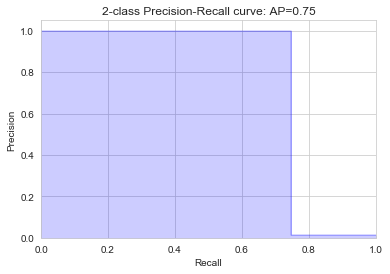

In [105]:
plot_PR(Y_pred,Y1)

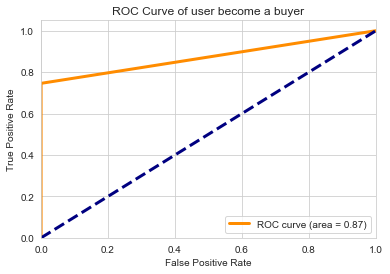

In [106]:
plot_ROC(Y_pred, Y1)

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [108]:
X1.min(), X1.max()

(-4.40792370929381, 103.54644836741168)

In [109]:
model = LogisticRegression()

k_fold = KFold(n_splits=2, random_state=RANDOM_STATE) 
score = cross_val_score(model, X1, Y1, cv=k_fold, scoring='accuracy').mean()
Y_pred = cross_val_predict(model, X1, Y1, cv=k_fold)

display_metrics("Logistic Regression",Y_pred, Y1)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


______________________________________________
Classifier: Logistic Regression
Accuracy: 1.0
ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
______________________________________________



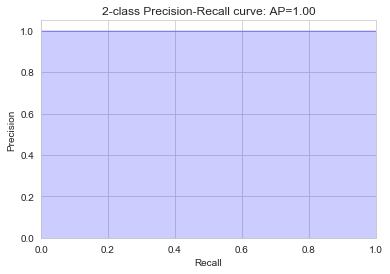

In [110]:
plot_PR(Y_pred,Y1)

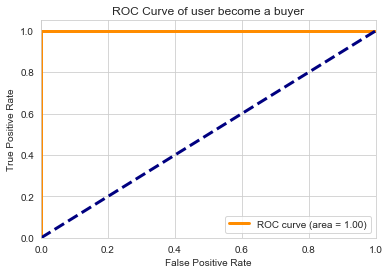

In [111]:
plot_ROC(Y_pred, Y1)

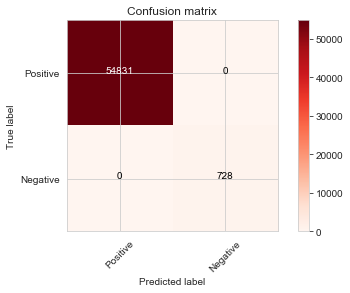

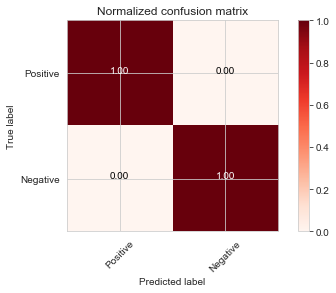

In [112]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y1, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
models = []
models.append(('DT', DecisionTreeClassifier(max_leaf_nodes=8)))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(15,))))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))
models.append(('SVC_RBF', SVC(kernel='rbf')))
models.append(('KNN_3', KNeighborsClassifier(n_neighbors=3)))
models.append(('KNN_5', KNeighborsClassifier(n_neighbors=5)))
models.append(('KNN_7', KNeighborsClassifier(n_neighbors=7)))
# models.append(('GNB', GaussianNB()))
# models.append(('GB', GradientBoostingClassifier()))

In [115]:
from sklearn.model_selection import learning_curve
names = []
train_sizes = []
train_scores = []
valid_scores = []
for name, model in models:
    train_size, train_score, valid_score = learning_curve(model, X1, Y1, 
                                            train_sizes=[0.5, 0.8], cv=2)
    names.append(name)
    train_sizes.append(train_size)
    train_scores.append(train_score)
    valid_scores.append(valid_score)
learning_curve_val = pd.DataFrame({'Name': names, 
                                   'Train_Sizes' : train_sizes,
                                   'Train_Scores': train_scores,
                                   'Validation_Scores': valid_scores})

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default v

In [116]:
learning_curve_val

,Name,Train_Sizes,Train_Scores,Validation_Scores
0,DT,"[13889, 22223]","[[1.0, 1.0], [1.0, 1.0]]","[[1.0, 1.0], [0.9999640028797696, 1.0]]"
1,MLP,"[13889, 22223]","[[1.0, 1.0], [1.0, 1.0]]","[[1.0, 1.0], [1.0, 1.0]]"
2,RF,"[13889, 22223]","[[1.0, 1.0], [1.0, 1.0]]","[[0.9999640028797696, 1.0], [1.0, 1.0]]"
3,SVC,"[13889, 22223]","[[1.0, 1.0], [1.0, 1.0]]","[[0.9594672426205904, 1.0], [0.959467242620590..."
4,SVC_RBF,"[13889, 22223]","[[1.0, 1.0], [1.0, 1.0]]","[[0.9594672426205904, 1.0], [0.959467242620590..."
5,KNN_3,"[13889, 22223]","[[1.0, 1.0], [1.0, 1.0]]","[[1.0, 1.0], [1.0, 1.0]]"
6,KNN_5,"[13889, 22223]","[[1.0, 1.0], [1.0, 1.0]]","[[1.0, 1.0], [1.0, 1.0]]"
7,KNN_7,"[13889, 22223]","[[1.0, 1.0], [1.0, 1.0]]","[[1.0, 1.0], [1.0, 1.0]]"


In [117]:
names = []
scores = []
for name, model in models:
    
    k_fold = KFold(n_splits=2, random_state=RANDOM_STATE) 
    score = cross_val_score(model, X1, Y1, cv=k_fold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})

print(kf_cross_val.sort_values(['Score'],ascending=0))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to 

      Name     Score
0       DT  1.000000
1      MLP  1.000000
2       RF  1.000000
5    KNN_3  1.000000
6    KNN_5  1.000000
7    KNN_7  1.000000
3      SVC  0.980382
4  SVC_RBF  0.980382


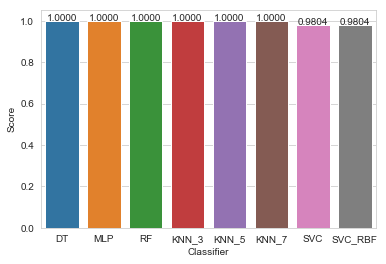

In [119]:
import seaborn as sns
kf_val = kf_cross_val.sort_values(['Score'],ascending=0)
sns.set_style("whitegrid")
ax = sns.barplot(x = 'Name', y = 'Score', data = kf_val)
ax.set(xlabel='Classifier', ylabel='Score')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [120]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

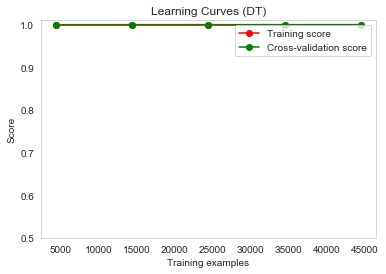

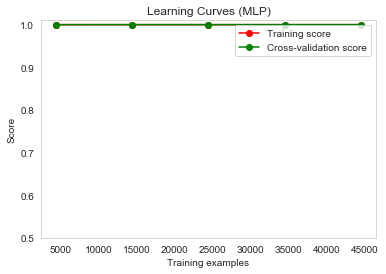

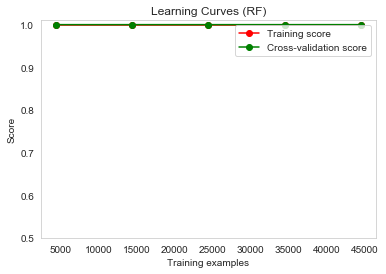

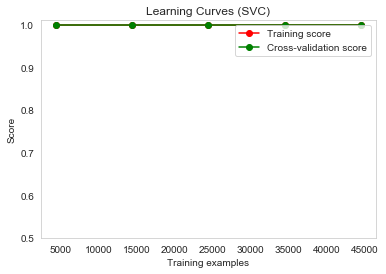

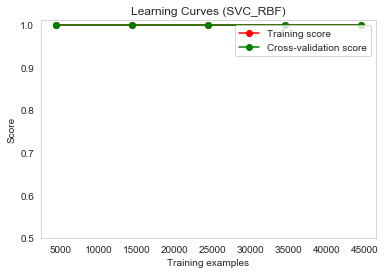

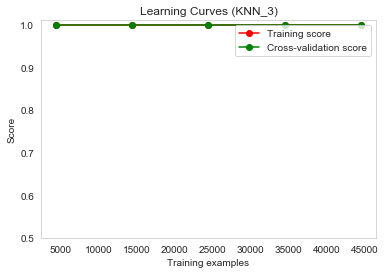

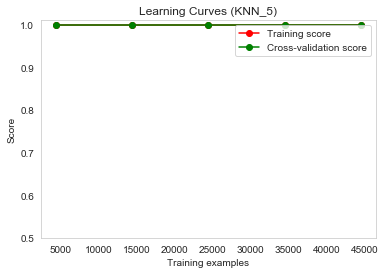

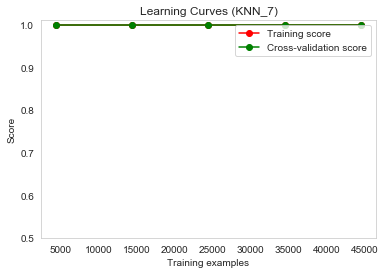

In [122]:
for name, model in models:

    title = "Learning Curves "+ "(" + name + ")"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    estimator = model
    plot_learning_curve(estimator, title, X1, Y1, ylim=(0.5, 1.01), cv=cv, n_jobs=4)